# **Data science project analyzing various circumstances leading to suicide in males and females across different age groups and estimating suicide cases:**

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## **1. Loading Data:**


In [2]:
#Loading data into dataframe

data = pd.read_csv(r'C:\Users\Admin\Desktop\Suicide-Rate-Prediction-with-Machine-Learning\\Data.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## **2. Familiarizing with Data:**


In [3]:
#Shape of dataframe

data.shape

(27820, 12)

In [4]:
#Listing the features of the dataset

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [6]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 
                'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [14]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [15]:
data.age_group.value_counts()

75+ years      4642
55-74 years    4642
25-34 years    4642
35-54 years    4642
15-24 years    4642
5-14 years     4610
Name: age_group, dtype: int64

In [16]:
data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

#### No. of countries avaialble in the dataset:

In [17]:
#Listing countries

country = data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

## **3. Visualizing the data:**

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'suicide_count'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicide_rate'}>],
       [<AxesSubplot:title={'center':'HDI for year'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>]], dtype=object)

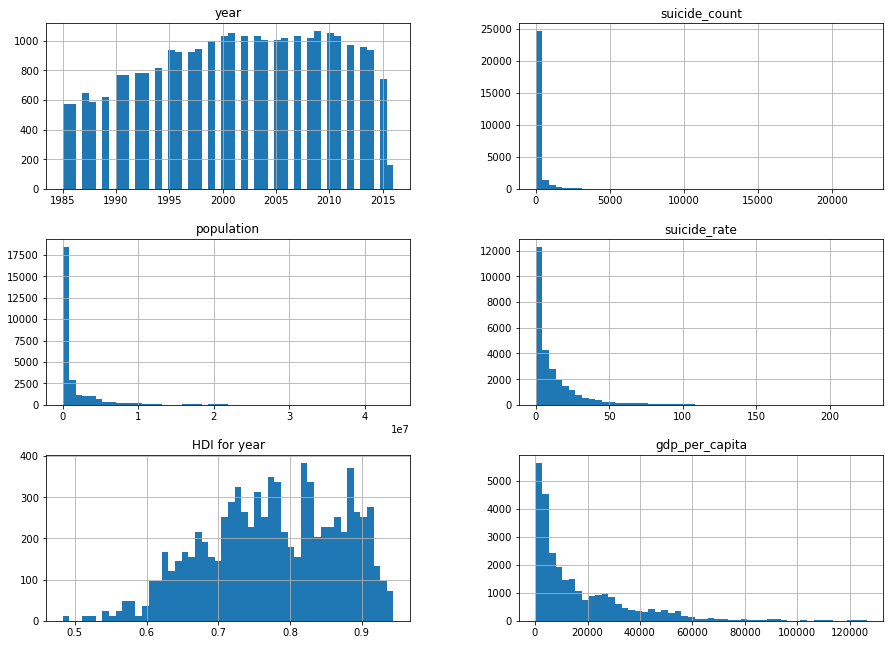

In [18]:
data.hist(bins = 50,figsize = (15,11))

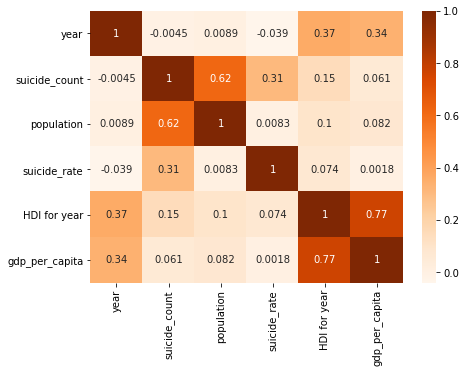

In [20]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


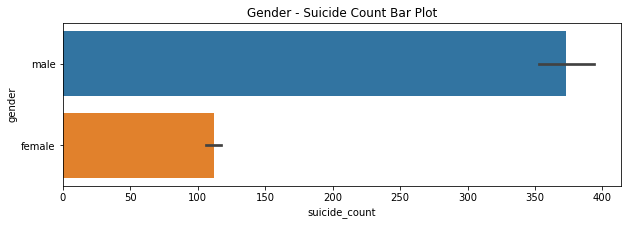

In [21]:
#Gender and suicide count bar plot

plt.figure(figsize=(10,3))
sns.barplot(data.suicide_count,data.gender)
plt.title('Gender - Suicide Count Bar Plot')
plt.show()

**The above bar plot shows that the suicide cases are more in male population.**

But lets see if this pattern exists in all the age groups and also generations. 

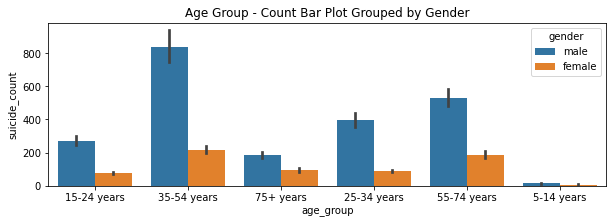

In [23]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,3))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = data)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

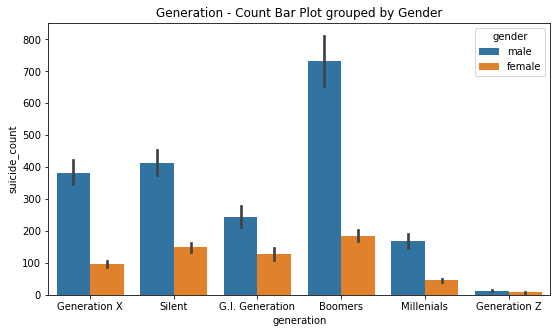

In [24]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = data)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

**From the above two bar plots, it is clear that men commit suicide considerably more than women irrespective of age group and generation they belong to.**

Now, lets check the suicide cases based on the age group.

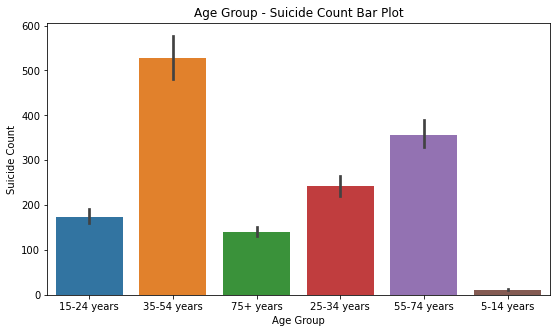

In [25]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,5))
sns.barplot(x=data['age_group'], y=data['suicide_count'])
plt.xlabel('Age Group')
plt.ylabel('Suicide Count')
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

The above boxplot shows that the suicide cases are more in the age group of 35-54 years followed by 55- 74 years. The surprising part is that the suicide cases in 5-14 year age group even though they are very less, mostly in tens.

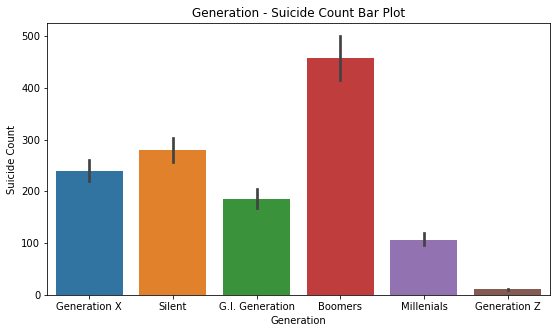

In [26]:
#Generation & Suicide Count Bar Plot

plt.figure(figsize=(9,5))
sns.barplot(x=data['generation'], y=data['suicide_count'])
plt.xlabel('Generation')
plt.ylabel('Suicide Count')
plt.title('Generation - Suicide Count Bar Plot')
plt.show()

* The above boxplot shows that the suicide cases are more in the boomers, silent and X generations. These generations are made up of people born until 1976 based on the details provided.
* On further observation, these generations are the ones were most of them are in the age group where most suicides occur.

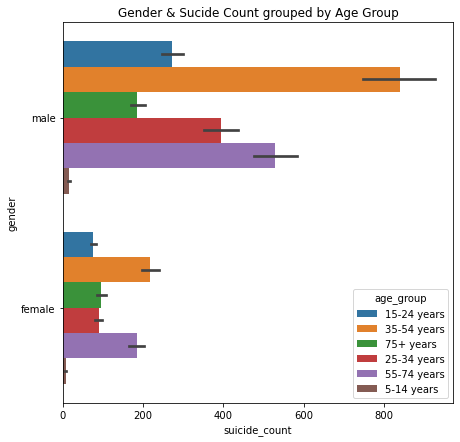

In [27]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="gender", x="suicide_count", hue="age_group", data=data)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.show()


* From the above graph, we can infer that 35-54 years age group is more prone to suicides irrespective of the gender frollowed by 55-74 years age group. 
* All together, it is obvious that males tend to commit suicide more than female.

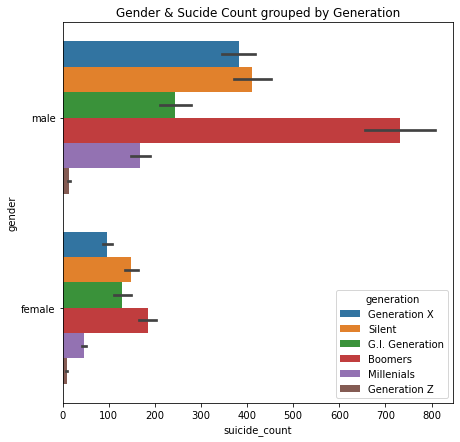

In [29]:
#Gender & Sucide Count grouped by Generation bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="gender", x="suicide_count", hue="generation", data=data)
plt.title('Gender & Sucide Count grouped by Generation')
plt.show()

* In the case of generation, the Bloomers generation had more suicide cases followed by Silent generation irrespective of the gender.
* Even when considered generation, males are more prone to commit suicide.

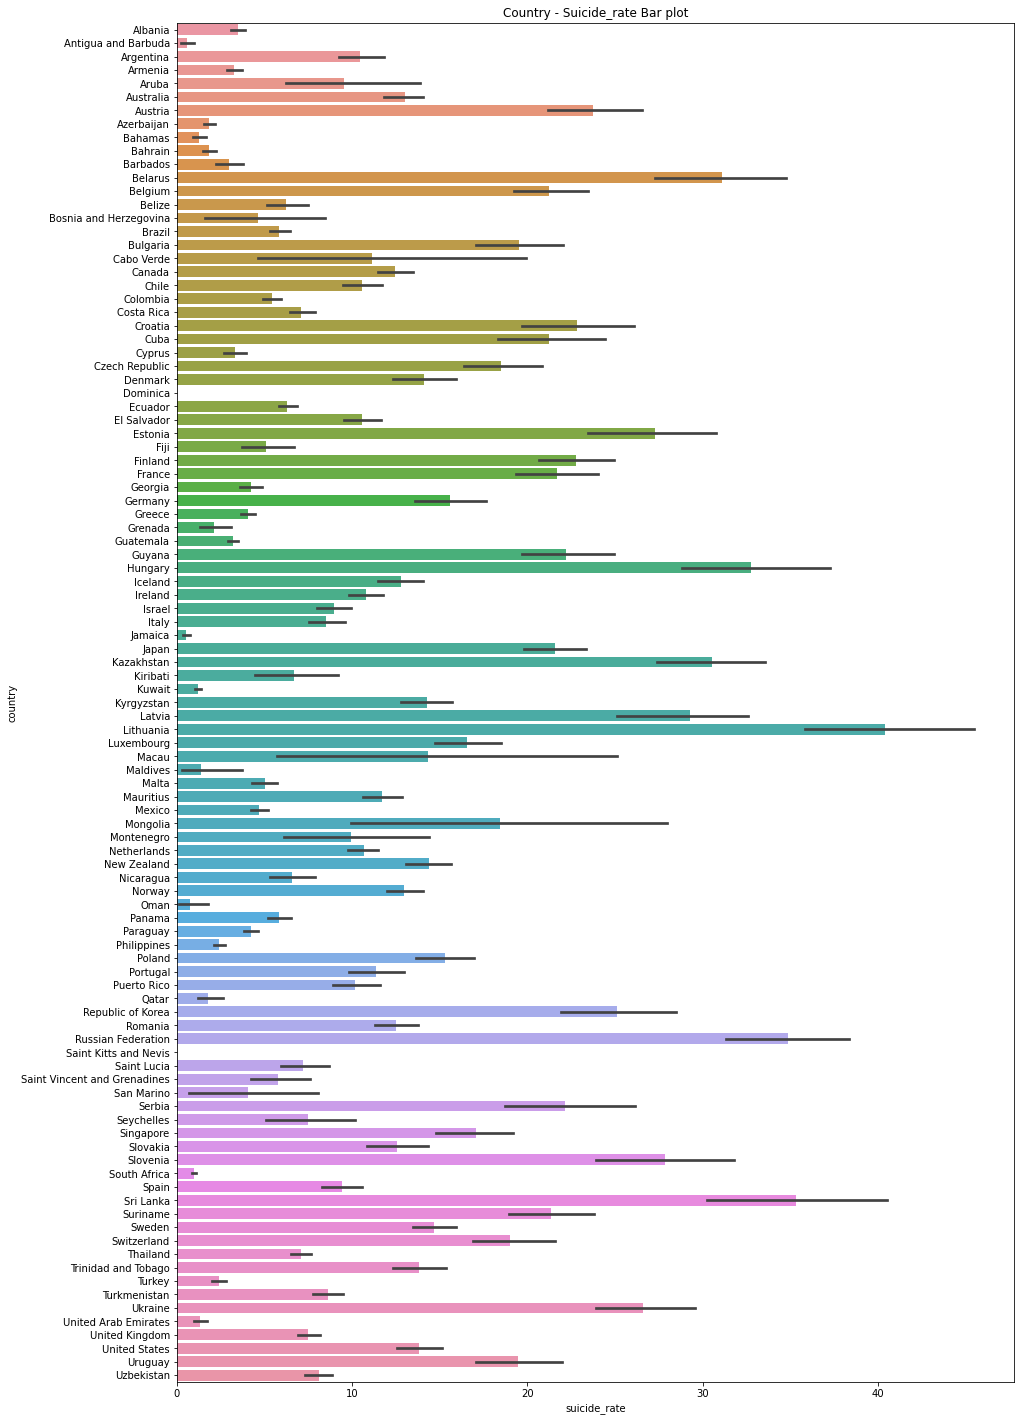

In [30]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

**The above bar plot shows that the  highest suicide rate country is  Lithuania followed by Sri Lanka.**

<AxesSubplot:xlabel='year'>

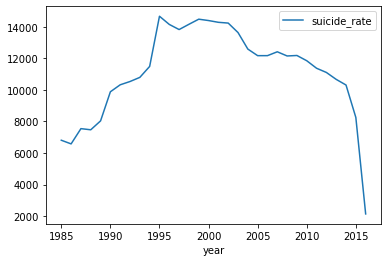

In [31]:
#Line plpot of year and suicide_rate

data[['year','suicide_rate']].groupby(['year']).sum().plot()

**The observations from the above plot are that the suicide rate had grown rapidly from year 1990 & the rate of suicide has drastically reduced in year 2016.** The dataset was collected during early 2016. So all the suicide cases of 2016 are not recorded in the dataset.

<Figure size 1440x720 with 0 Axes>

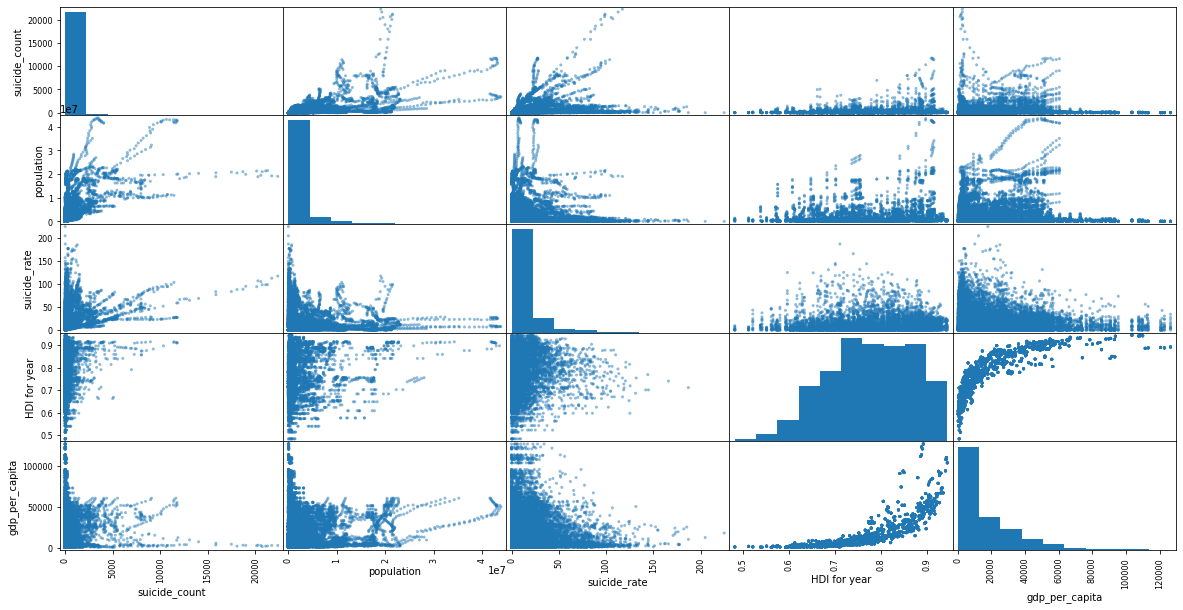

In [32]:
#Scatter matrix for checking outlier

plt.figure(figsize=(20,10))
attributes = ['suicide_count', 'population', 'suicide_rate','HDI for year', 
              'gdp_for_year','gdp_per_capita']
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

## **4. Data Preprocessing & EDA:**

In [33]:
data.describe()

,year,suicide_count,population,suicide_rate,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [34]:
#checking the data for null or missing values

data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

From the above stats, it is clear that the column, `HDI for year` has 19456 null values out of 27820 samples which is approximately 70% of the column. This may tamper the model performance so, dropping the `HDI for year` column from the dataset.

In [35]:
#dropping the HDI for year column

data = data.drop(['HDI for year'], axis = 1)
data.shape

(27820, 11)

In [36]:
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

The column country-year is just a combination of country and year columns. So dropping that column.

In [37]:
#dropping the country-year for year column

data = data.drop(['country-year'], axis = 1)
data.shape

(27820, 10)

Now we are going further with 10 features which also include the target column. For further assurance, lets drop all the null rows from the dataset.

In [38]:
#droppinf off any null rows (is any)

data = data.dropna()
data.shape

(27820, 10)

The non-numerical labeled columns, country, year, gender, age_group and generation are to be converted to numerical labels that can be don by using SkLearn's LabelEncoder.

In [40]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age_group', 'gender', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [41]:
#creating a copy of dataset for statistical test

stat_data = data.copy()
stat_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [42]:
#Checking the data type of each column

data.dtypes

country             int64
year                int64
gender              int64
age_group           int64
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int64
dtype: object

In [43]:
# Converting the column 'gdp_for_year' to float from object

data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

In [44]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

In [45]:
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,2
1,0,2,1,2,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,5
2,0,2,0,0,-0.085938,-0.101142,-0.073885,-0.182942,-0.400243,2
3,0,2,1,5,-0.187500,-0.294064,-0.089172,-0.182942,-0.400243,1
4,0,2,1,1,-0.125000,-0.112232,-0.172611,-0.182942,-0.400243,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.640625,2.297696,-0.192994,0.059520,-0.329631,2
27816,100,29,0,5,-0.125000,-0.058824,-0.217197,0.059520,-0.329631,5
27817,100,29,1,3,0.273438,1.679341,-0.243312,0.059520,-0.329631,3
27818,100,29,0,3,0.148438,1.585323,-0.275159,0.059520,-0.329631,3


## **5. Splitting the Data:**

The data is split into train & test sets, 80-20 split.

In [46]:
# Sepratating & assigning features and target columns to X & y

y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)
X.shape, y.shape

((27820, 9), (27820,))

In [47]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

## **6. Model Building & Training:**

In [48]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [49]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

### **6.1. k-Nearest Neighbors Regression:**

In [57]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [58]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 1, 'weights': 'uniform'}


In [59]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

**Performance Evaluation:**

In [60]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.812

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.5358202421806745


**Storing Results:**

In [61]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

Evaluating training and testing set performance with different numbers of neighbors from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of
n_neighbors on the x-axis.

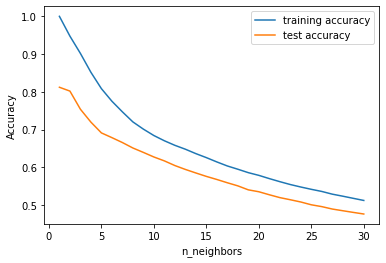

In [62]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

**OBSERVATIONS:** This discrepancy between performance on the training set and the testing set fro n_neighbors < 5 is a clear sign of overfitting. After that, the perfromance is not so great so, moving on to the other models.

### **6.2. Linear Regression**

In [63]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

**Performance Evaluation:**

In [65]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.288
Linear Regression: Accuracy on test Data: 0.296

Linear Regression: The RMSE of the training set is: 1.0129029956234736
Linear Regression: The RMSE of the testing set is: 1.0369865239324312


**Storing Results:**

In [66]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

**OBSERVATIONS:** The model preformance is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.

### **6.3. Decision Trees:** *Regression*


In [67]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [69]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [70]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.967
Decision Tree: Accuracy on test Data: 0.952

Decision Tree: The RMSE of the training set is: 0.21965355867472552
Decision Tree: The RMSE of the testing set is: 0.2714321926143292


**Storing Results:**

In [71]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

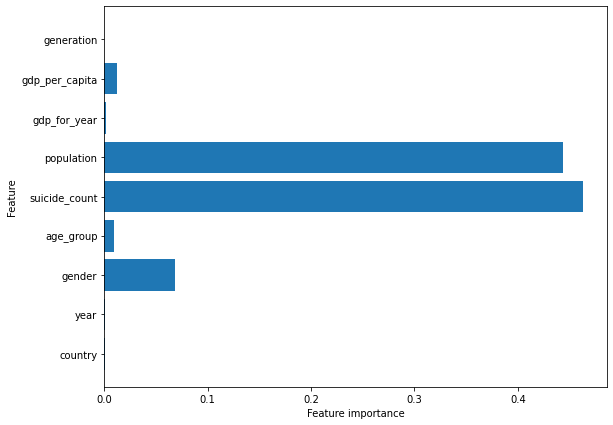

In [0]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Evaluating training and testing set performance with different numbers of max_depth from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

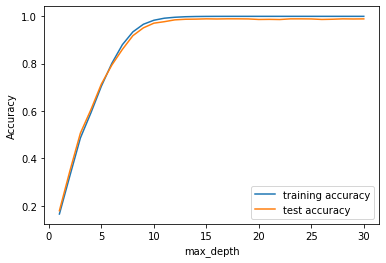

In [72]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

**OBSERVATIONS:** The model preformance is gradually increased on incresing the max_depth parameter. But after max_depth = 9, the model overfits. So the model is considered with max_depth = 9 which has an accuracy of 95.2%.

### **6.4. Random Forest:** *Ensemble of Decision Trees*

In [73]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [74]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [75]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.987
Random Forest: Accuracy on test Data: 0.980

Random Forest: The RMSE of the training set is:  0.13559289092595125
Random Forest: The RMSE of the testing set is:  0.17263286827332947


**Storing Results:**

In [76]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

Evaluating training and testing set performance with different numbers of max_depth from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

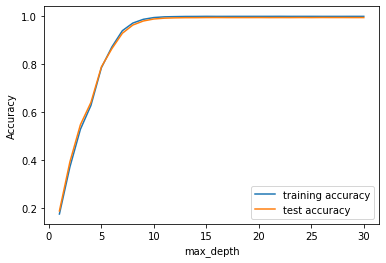

In [77]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

**OBSERVATIONS:** The random forest gives us an accuracy of 99.4%, better than the linear models or a single decision tree, without tuning any parameters. But this might also be a case of overfitting. So, the prarameter are tuned and the finalized model has an accuracy of 98% which is better than the linear & decision tree models.

### **6.5. Gradient Boosted Regression Trees (gradient boosting machines):** *Ensemble of Decision Trees*

In [78]:
# Gradient Boosted Regression Trees model
from sklearn.ensemble import GradientBoostingRegressor

# instantiate the model
gbrt = GradientBoostingRegressor(learning_rate=0.5)

# fit the model 
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5)

In [79]:
#predicting the target value from the model for the samples
y_test_gbrt = gbrt.predict(X_test)
y_train_gbrt = gbrt.predict(X_train)

**Performance Evaluation:**

In [80]:
#computing the accuracy of the model performance
acc_train_gbrt = gbrt.score(X_train, y_train)
acc_test_gbrt = gbrt.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, y_train_gbrt))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, y_test_gbrt))

print("Gradient Boosted Regression Trees: Accuracy on training Data: {:.3f}".format(acc_train_gbrt))
print("Gradient Boosted Regression Trees: Accuracy on test Data: {:.3f}".format(acc_test_gbrt))
print('\nGradient Boosted Regression Trees: The RMSE of the training set is: ', rmse_train_gbrt)
print('Gradient Boosted Regression Trees: The RMSE of the testing set is: ', rmse_test_gbrt)

Gradient Boosted Regression Trees: Accuracy on training Data: 0.988
Gradient Boosted Regression Trees: Accuracy on test Data: 0.983

Gradient Boosted Regression Trees: The RMSE of the training set is:  0.13022009023453274
Gradient Boosted Regression Trees: The RMSE of the testing set is:  0.15898361554125473


**Storing Results:**

In [81]:
storeResults('Gradient Boosted Regression',acc_train_gbrt, acc_test_gbrt, rmse_train_gbrt, rmse_test_gbrt)

Evaluating training and testing set performance with different numbers of learning_rate from 0.1 to 0.9. The plot shows the training and test set accuracy on the y-axis against the setting of learning_rate on the x-axis.

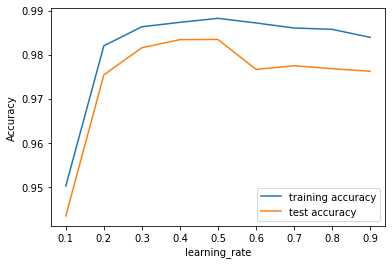

In [82]:
training_accuracy = []
test_accuracy = []
r = []
# try learning_rate from 0.1 to 0.9
rate = range(1, 10)
for n in rate:
  # fit the model
  gbrt = GradientBoostingRegressor(learning_rate=n*0.1)
  gbrt.fit(X_train, y_train)
  r.append(n*0.1)
  # record training set accuracy
  training_accuracy.append(gbrt.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(gbrt.score(X_test, y_test))

#plotting the training & testing accuracy for learning_rate from 0.1 to 0.9
plt.plot(r, training_accuracy, label="training accuracy")
plt.plot(r, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

**OBSERVATIONS:** The model didnt overfit when trained without tuning any parameters. The model accuracy obtained is 94.3%. 

### **6.6. Multilayer Perceptrons (MLPs):** *Deep Learning*

In [83]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=[100, 100])

In [84]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [85]:
#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.913
Multilayer Perceptron Regression: Accuracy on test Data: 0.916

Multilayer Perceptron Regression: The RMSE of the training set is:  0.35452892571380534
Multilayer Perceptron Regression: The RMSE of the testing set is:  0.35785619733399215


**Storing Results:**

In [86]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

**OBSERVATIONS:** The model didnt overfit when trained without tuning any parameters. But, the model accuracy obtained is 89.2%. 

So, hyperparameter tuning is performed for the model. The tuned parameters are number of hidden layers and the hidden_units of each layer with default values of alpha. The otimized Gradient Boosted model gives us an accuracy of 92.8%, with parameter tuning.

### **6.7. XGBoost Regression:**

In [88]:
#XGBoost Regression model
from xgboost import XGBRegressor

# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
#fit the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [89]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [90]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.993
XGBoost Regression: Accuracy on test Data: 0.988

XGBoost Regression: The RMSE of the training set is:  0.09961280009300265
XGBoost Regression: The RMSE of the testing set is:  0.13387205285067624


**Storing Results:**

In [91]:
storeResults('XGBoost Regression',acc_train_xgb, acc_test_xgb, rmse_train_xgb, rmse_test_xgb)

**OBSERVATIONS:** Upon tuning the hyperparameter, the model performance increased, and the resulting model performance is 98.8%.

### **6.8. Bagging Regression:**

In [92]:
#Bagging Regression model
from sklearn.ensemble import BaggingRegressor

#instantiate the model
br = BaggingRegressor(n_estimators=1)

#fit the model
br.fit(X_train, y_train)

BaggingRegressor(n_estimators=1)

In [93]:
#predicting the target value from the model for the samples
y_test_br = br.predict(X_test)
y_train_br = br.predict(X_train)

**Performance Evaluation:**

In [94]:
#computing the accuracy of the model performance
acc_train_br = br.score(X_train, y_train)
acc_test_br = br.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_br = np.sqrt(mean_squared_error(y_train, y_train_br))
rmse_test_br = np.sqrt(mean_squared_error(y_test, y_test_br))

print("Bagging Regression: Accuracy on training Data: {:.3f}".format(acc_train_br))
print("Bagging Regression: Accuracy on test Data: {:.3f}".format(acc_test_br))
print('\nBagging Regression: The RMSE of the training set is: ', rmse_train_br)
print('Bagging Regression: The RMSE of the testing set is: ', rmse_test_br)

Bagging Regression: Accuracy on training Data: 0.993
Bagging Regression: Accuracy on test Data: 0.982

Bagging Regression: The RMSE of the training set is:  0.1016616173299217
Bagging Regression: The RMSE of the testing set is:  0.16470744330824405


**Storing Results:**

In [95]:
storeResults('Bagging Regression',acc_train_br, acc_test_br, rmse_train_br, rmse_test_br)

Evaluating training and testing set performance with different numbers of n_estimators from 1 to 50. The plot shows the training and test set accuracy on the y-axis against the setting of n_estimators on the x-axis.

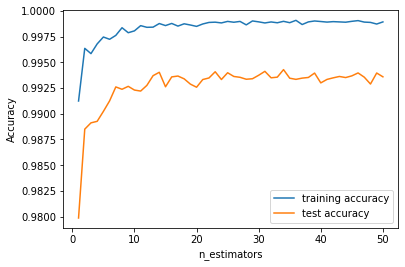

In [96]:
training_accuracy = []
test_accuracy = []
# try n_estimators from 1 to 50
est = range(1, 51)
for n in est:
  # fit the model
  br = BaggingRegressor(n_estimators=n)
  br.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(br.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(br.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.plot(est, training_accuracy, label="training accuracy")
plt.plot(est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

**OBSERVATIONS:** From the above plot, it is clear that the model performs very well on this dataset. Even with tuning of n_estimators parameters, the training accuracy always stayed above 99% & the test data accuracy is always above 97%. This may or may not be the case of overfitting. 

### **6.9. Custom Ensemble - SuperLearner:**

In [97]:
### You will need mlens package
!pip install mlens

In [98]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from mlens.metrics.metrics import rmse

from sklearn.metrics import accuracy_score

[MLENS] backend: threading


In [99]:
ensemble = SuperLearner(scorer=rmse, random_state=555, verbose=2)

# Build the first layer
ensemble.add(mlp)
ensemble.add(knn_grid)
ensemble.add_meta(lr)

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...7429310>)],
   n_jobs=-1, name='group-2', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function rmse at 0x00000014C7429310>, shuffle=False,
       verbose=2)

In [100]:
ensemble.fit(X_train, y_train)


Fitting 3 layers
Processing layer-1             done | 00:00:53
Processing layer-2             done | 00:01:43
Processing layer-3             done | 00:00:00
Fit complete                        | 00:02:37


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...7429310>)],
   n_jobs=-1, name='group-2', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function rmse at 0x00000014C7429310>, shuffle=False,
       verbose=2)

In [101]:
#Predicting the target of samples from the model
y_train_en = ensemble.predict(X_train)
y_test_en = ensemble.predict(X_test)


Predicting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:01

Predicting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:00


**Performance Evaluation:**

In [102]:
#computing the accuracy of the model performance
acc_train_en = sklearn.metrics.r2_score(y_train,y_train_en)
acc_test_en = sklearn.metrics.r2_score(y_test,y_test_en)

#computing root mean squared error (RMSE)
rmse_train_en = rmse(y_train,y_train_en)
rmse_test_en = rmse(y_test,y_test_en)

print("Custom Ensemble: Accuracy on training Data: {:.3f}".format(acc_train_en))
print("Custom Ensemble: Accuracy on test Data: {:.3f}".format(acc_test_en))
print('\nCustom Ensemble: The RMSE of the training set is: ', rmse_train_en)
print('Custom Ensemble: The RMSE of the testing set is: ', rmse_test_en)

Custom Ensemble: Accuracy on training Data: 0.902
Custom Ensemble: Accuracy on test Data: 0.898

Custom Ensemble: The RMSE of the training set is:  0.3759421564219535
Custom Ensemble: The RMSE of the testing set is:  0.3949291835141574


**Storing Results:**

In [103]:
storeResults('Ensemble_SuperLearner',acc_train_en, acc_test_en, rmse_train_en, rmse_test_en)

**OBSERVATIONS:**  The above results show that the ensemble model performance is much better than linear regression model. In a way this model is an improved model of the models used in this.

## **7. Comparision of Models:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [104]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [105]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,k-Nearest Neighbors Regression,1.000,0.812,0.000,0.536
1,Linear Regression,0.288,0.296,1.013,1.037
2,Decision Tree,0.967,0.952,0.220,0.271
3,Random Forest,0.987,0.980,0.136,0.173
4,Gradient Boosted Regression,0.988,0.983,0.130,0.159
5,Multilayer Perceptron Regression,0.913,0.916,0.355,0.358
6,XGBoost Regression,0.993,0.988,0.100,0.134
7,Bagging Regression,0.993,0.982,0.102,0.165
8,Ensemble_SuperLearner,0.902,0.898,0.376,0.395


In [106]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
6,XGBoost Regression,0.993,0.988,0.100,0.134
4,Gradient Boosted Regression,0.988,0.983,0.130,0.159
7,Bagging Regression,0.993,0.982,0.102,0.165
3,Random Forest,0.987,0.980,0.136,0.173
2,Decision Tree,0.967,0.952,0.220,0.271
5,Multilayer Perceptron Regression,0.913,0.916,0.355,0.358
8,Ensemble_SuperLearner,0.902,0.898,0.376,0.395
0,k-Nearest Neighbors Regression,1.000,0.812,0.000,0.536
1,Linear Regression,0.288,0.296,1.013,1.037


**OBSERVATIONS:** Among all the trained modesl, XGBoost performance is better. It is understandable because this model is very good in execution Speed & model performance.

## **8. Statistical Tests:**

In [107]:
#improting required libraries
from scipy import stats

### **8.1. Test 1: To check the difference in suicide rates between male and female**
Using independent sample t-test to check the difference in suicide rates between male and female. The hypothesis statements for this test are: 

**H0:** There is no difference in the suicide rates among male and female (Null).<br>
**H1:** There is difference in the suicide rates among male and female (Alternate).


In [108]:
#collecting male suicide rate data
male = stat_data['suicide_rate'][stat_data['gender'] == 1]
male

0         6.71
1         5.19
3         4.59
4         3.28
8         0.73
         ...  
27809    11.61
27811    11.33
27812    11.10
27813     7.56
27817     2.17
Name: suicide_rate, Length: 13910, dtype: float64

In [109]:
#collecting female suicide rate data
female = stat_data['suicide_rate'][stat_data['gender'] == 0]
female

2        4.83
5        2.81
6        2.15
7        1.56
9        0.00
         ... 
27814    5.92
27815    2.96
27816    2.58
27818    1.67
27819    1.46
Name: suicide_rate, Length: 13910, dtype: float64

In [110]:
#calculating p value
ttest,pval = stats.ttest_rel(male, female)

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


**Test Conclusion:** By performing T-test, the result obtained is to reject the null hypothesis. This basically means that there is different in suicide rates of male & female.

### **8.2. Test 2: To find out the dependence of suicide rate on the age.**
Finding out whether there is a dependence of suicide rate on the age using the Chi- Square test. The hypothesis statements for this test are: 

**H0:** Suicide rate and age are independent (Null).<br>
**H1:** Suicide rate and age are dependent (Alternate). 

In [111]:
#Creating Contingency Table
contingency_table = pd.crosstab(stat_data.suicide_rate, stat_data.age_group)

In [112]:
#Significance Level 5%
alpha=0.05

In [113]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [114]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 26864.700169422224


In [115]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p) 
#Here, pvalue = 0.0 and a low pvalue suggests that your sample provides enough evidence that you can reject  H0  for the entire population.

Significance level:  0.05
Degree of Freedom:  26485
chi-square statistic: 39571.48433519147
critical_value: 26864.700169422224
p-value: 0.0


In [116]:
 #compare chi_square_statistic with critical_value and p-value 
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")
    
if p<=alpha:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

Reject H0,There is a dependency between Age group & Suicide rate.
Reject H0,There is a dependency between Age group & Suicide rate.


**Test Conclusion:** By performing Chi- Square test, the result obtained is to reject the null hypothesis. This basically means that there is dependency between Age group & Suicide rate.

## **9. Conclusion:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this project I have analyzed numerous factors after gathering dataset from Kaggle and implemented various machine learning algorithms to observe, compare and find corresponding circumstances leading to suicide. The resultant models have then been used to do suicide case estimation on the testing datset.The final take away form this project is the working of different machine learning models on a dataset and understanding their parameters. The final conclusion on the suicide dataset are that the irrespective of age group and generation, male population are more prone to commit suicide than female. 